In [2]:
import pandas as pd

df = pd.read_csv("../data/calendar.csv.gz", compression="gzip")

/var/folders/k6/hdzmrkf915d0twbr_qmhy9l00000gn/T/ipykernel_93385/2784581090.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/calendar.csv.gz", compression="gzip")


In [3]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,97503,2024-12-15,f,$55.00,NaN,7.0,150.0
1,97503,2024-12-16,f,$55.00,NaN,7.0,150.0
2,97503,2024-12-17,t,$55.00,NaN,7.0,150.0
3,97503,2024-12-18,t,$55.00,NaN,7.0,150.0
4,97503,2024-12-19,t,$55.00,NaN,7.0,150.0


In [4]:
df.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [19]:
import locale

locale.setlocale(locale.LC_ALL, 'en_US')

df["date"] = pd.to_datetime(df["date"])
df["price_numeric"] = df["price"].str[1:].map(locale.atof)
now = pd.Timestamp.now()
df = df[df["date"] < now]
#df.set_index("date", inplace=True)

In [20]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_numeric
0,97503,2024-12-15,f,$55.00,NaN,7.0,150.0,55.0
1,97503,2024-12-16,f,$55.00,NaN,7.0,150.0,55.0
2,97503,2024-12-17,t,$55.00,NaN,7.0,150.0,55.0
3,97503,2024-12-18,t,$55.00,NaN,7.0,150.0,55.0
4,97503,2024-12-19,t,$55.00,NaN,7.0,150.0,55.0


In [21]:
weekly_avg_price = df.resample('W', on='date')['price_numeric'].mean()

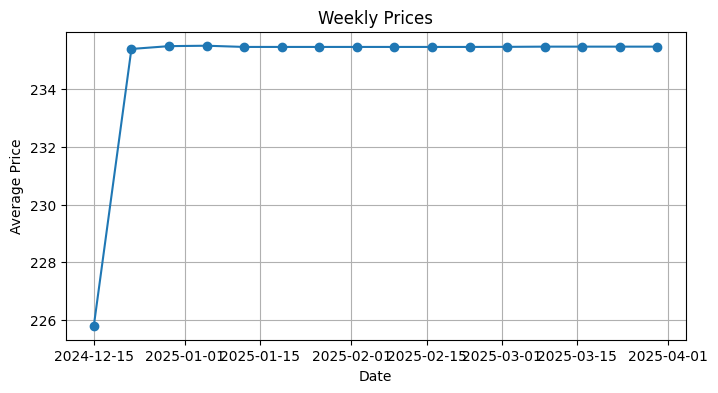

In [22]:
import matplotlib.pyplot as plt

# Plot the monthly averages
plt.figure(figsize=(8, 4))
plt.plot(weekly_avg_price.index, weekly_avg_price.values, marker='o')
plt.title('Weekly Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.savefig("weekly_average_price.png")
plt.show()